In [26]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from src.funs_1_6 import jacobi_iteration
from src.funs_1_6 import gauss_seidel_iteration
from src.funs_1_6 import successive_over_relaxation

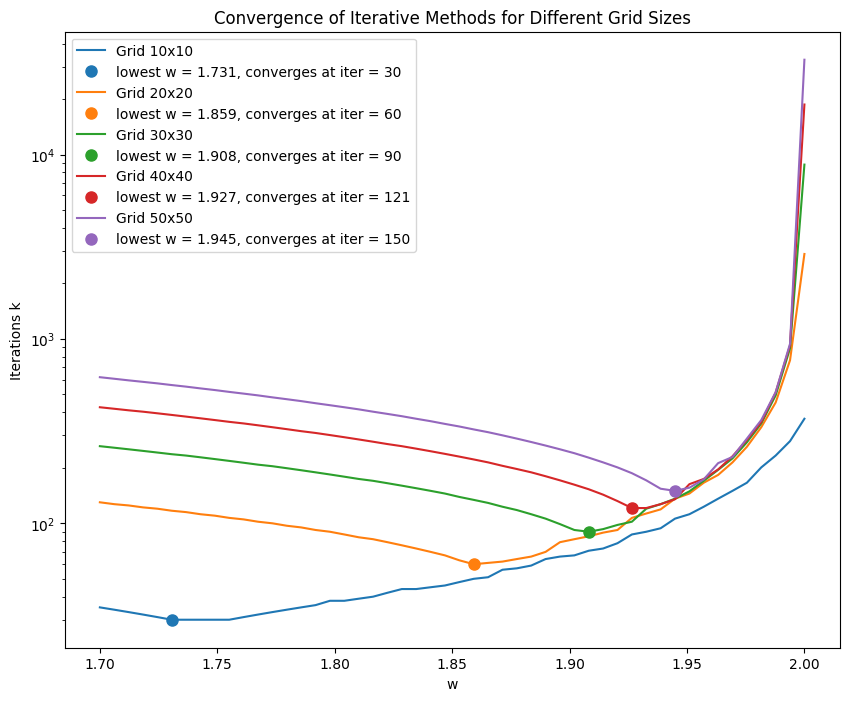

In [ ]:
grid = np.zeros((50, 50))
grid[-1, :] = 1   # top: c = 1
w = 1.85

numerical_solution_j, counter_j = jacobi_iteration(grid.copy(), 10000, 5)
numerical_solution_g, counter_g = gauss_seidel_iteration(grid.copy(), 10000, 5)
numerical_solution_s, counter_s = successive_over_relaxation(grid.copy(), 10000, w, 5)
print(f'Counter j: {counter_j}')
print(f'Counter g: {counter_g}')
print(f'Counter s: {counter_s}')
y_values = np.linspace(0, 1, 50)
numerical_profile_j = numerical_solution_j[:, 25]
numerical_profile_g = numerical_solution_g[:, 25]
numerical_profile_s = numerical_solution_s[:, 25]
analytical_profile = y_values  # Since c(y) = y analytically

fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi= 300, sharex=True, sharey=True)

# Jacobi
axes[0].plot(y_values, analytical_profile, label="Analytical: $c(y) = y$", linestyle="--", color="red", lw=4)
axes[0].plot(y_values, numerical_profile_j, label="Numerical Solution", marker="o", markersize=3, linestyle="-", color="green")
axes[0].set_title("Jacobi vs. Analytical", fontsize=16)
axes[0].set_xlabel("y", fontsize= 14)


# Gauss-Seidel
axes[1].plot(y_values, analytical_profile, linestyle="--", color="red", lw=4)
axes[1].plot(y_values, numerical_profile_g, marker="o", markersize=3, linestyle="-", color="green")
axes[1].set_title("Gauss-Seidel vs. Analytical", fontsize=16)
axes[1].set_xlabel("y", fontsize= 14)


# Successive Over-Relaxation (SOR)
axes[2].plot(y_values, analytical_profile, linestyle="--", color="red", lw=4)
axes[2].plot(y_values, numerical_profile_s, marker="o", markersize=3, linestyle="-", color="green")
axes[2].set_title("SOR vs. Analytical", fontsize=16)
axes[2].set_xlabel("y", fontsize= 14)

for ax in axes:
    ax.yaxis.set_tick_params(labelleft=True)  # Force y-axis labels on all subplots

fig.supylabel("Concentration $c(y)$", fontsize=14)  # Shared y-axis label on the side
fig.legend(["Analytical: $c(y) = y$", "Numerical Solution"], loc="lower center", ncol=2, fontsize=12, frameon=False)
# Adjust layout
plt.subplots_adjust(bottom=0.2, top=0.9, left=0.07, right=0.98, wspace=0.3)  # More space at the bottom

# Save the full figure
save_folder = "fig"
os.makedirs(save_folder, exist_ok=True)
save_path = os.path.join(save_folder, "comparison_plot.png")
plt.savefig(save_path, dpi=300)

# Show the plot
plt.show()
p_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
w_list = [1.7, 1.8, 1.9]
jacobi_iters, gs_iters = [], []
sor_iters_1, sor_iters_2, sor_iters_3 = [], [], []

for p in p_list:
    numerical_solution_j, counter_j = jacobi_iteration(grid, 100000, p)
    numerical_solution_g, counter_g = gauss_seidel_iteration(grid, 100000, p)
    jacobi_iters.append(counter_j)
    gs_iters.append(counter_g)
    for i, w in enumerate(w_list):
        numerical_solution_s, counter_s = successive_over_relaxation(grid, 100000, w, p)
        
        if i == 0:
            sor_iters_1.append(counter_s)
        elif i == 1:
            sor_iters_2.append(counter_s)
        elif i == 2:
            sor_iters_3.append(counter_s)    
            
# Plot the results
plt.figure(figsize=(10, 8), dpi=300)
plt.plot(p_list, jacobi_iters, "k--d", label="Jacobi", color = "red")
plt.plot(p_list, gs_iters, "k--d", label="Gauss-Seidel", color = "blue")
plt.plot(p_list, sor_iters_1, "b-o", label=f"SOR (w={w_list[0]})", color="green")
plt.plot(p_list, sor_iters_2, "r-s", label=f"SOR (w={w_list[1]})", color="green")
plt.plot(p_list, sor_iters_3, "g-^", label=f"SOR (w={w_list[2]})", color="green")
plt.yscale("log")  # Log scale for iterations
plt.xlabel("p")
plt.ylabel("Iterations k")
plt.legend()
plt.title("Convergence of Iterative Methods")
plt.show()

# Function to compute iterations for given grid size
def plot_convergence_for_grid(grid_size):
    grid = np.zeros((grid_size, grid_size))
    grid[-1, :] = 1   # top: c = 1
    sor_w_iters = []
    w_space = np.linspace(1.7, 2, 50)
    p = 5

    # Collect results for each w
    for w in w_space:
        numerical_solution_s, counter_s = successive_over_relaxation(grid, 100000, w, p)
        sor_w_iters.append((counter_s, w))

    # Extract iteration counts for plotting
    iterations = [sor[0] for sor in sor_w_iters]
    w_values = [sor[1] for sor in sor_w_iters]

    return iterations, w_values

# List of grid sizes to plot
grid_sizes = [10, 20, 30, 40, 50]

# Plot the results for each grid size
plt.figure(figsize=(10, 8))

for grid_size in grid_sizes:
    iterations, w_values = plot_convergence_for_grid(grid_size)
    
    # Plot the line and save the color
    line, = plt.plot(w_values, iterations, label=f"Grid {grid_size}x{grid_size}")
    line_color = line.get_color()  # Get the color of the line
    
    # Find the index of the minimum iteration count
    min_iter_idx = np.argmin(iterations)
    min_iter = iterations[min_iter_idx]
    min_w = w_values[min_iter_idx]
    
    # Plot a dot at the lowest point with the same color as the line
    plt.plot(min_w, min_iter, 'o', color=line_color, markersize=8, label=f"lowest w = {min_w:.3f}, converges at iter = {min_iter}")

plt.yscale("log")  # Log scale for iterations
plt.xlabel("w")
plt.ylabel("Iterations k")
plt.legend()
plt.title("Convergence of Iterative Methods for Different Grid Sizes")
plt.show()

